<a href="https://colab.research.google.com/github/BraccioCodes/breast-cancer-ml/blob/main/BREAST_CANCER_PREDICTION_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data overview

df = pd.read_csv('/content/breastcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Missing and duplicate values

missing = df.isnull().sum()
duplicated = df.duplicated().sum()
print(f'Missing values: {missing}')
print(f'Duplicate values: {duplicated}')

Missing values: id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [ ]:
# Outlier detection

def outlier_detection(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  outliers = data[(data[column]<lower)|(data[column]>upper)]
  print(f'Outliers in {column}: {len(outliers)}')

  return outliers

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
  outlier_detection(df, column)

Outliers in id: 81
Outliers in radius_mean: 14
Outliers in texture_mean: 7
Outliers in perimeter_mean: 13
Outliers in area_mean: 25
Outliers in smoothness_mean: 6
Outliers in compactness_mean: 16
Outliers in concavity_mean: 18
Outliers in concave points_mean: 10
Outliers in symmetry_mean: 15
Outliers in fractal_dimension_mean: 15
Outliers in radius_se: 38
Outliers in texture_se: 20
Outliers in perimeter_se: 38
Outliers in area_se: 65
Outliers in smoothness_se: 30
Outliers in compactness_se: 28
Outliers in concavity_se: 22
Outliers in concave points_se: 19
Outliers in symmetry_se: 27
Outliers in fractal_dimension_se: 28
Outliers in radius_worst: 17
Outliers in texture_worst: 5
Outliers in perimeter_worst: 15
Outliers in area_worst: 35
Outliers in smoothness_worst: 7
Outliers in compactness_worst: 16
Outliers in concavity_worst: 12
Outliers in concave points_worst: 0
Outliers in symmetry_worst: 23
Outliers in fractal_dimension_worst: 24
Outliers in Unnamed: 32: 0


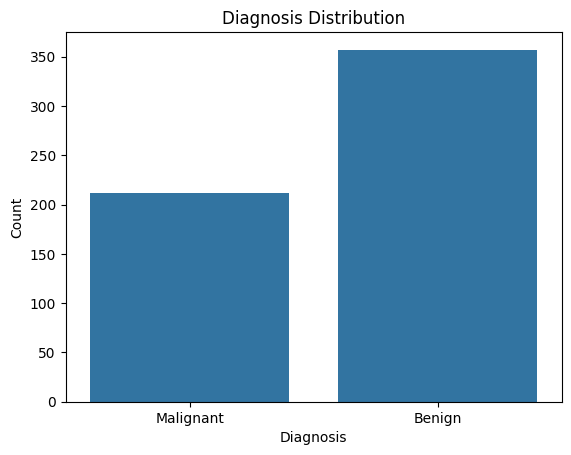

In [ ]:
# EDA

sns.countplot(data=df, x='diagnosis')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Choosing features

X_mean = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [ ]:
# Scaling

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_mean)
X_scaled = pd.DataFrame(X_scaled, columns=X_mean.columns)
X_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.185611,0.079867,0.198031,0.286394,0.025900,0.178848,0.269521,0.287188,0.058043,0.149360
std,0.863737,0.763950,0.839923,0.971065,0.742954,0.806548,0.788212,0.722720,0.811073,0.838523
min,-1.565931,-1.621670,-1.467335,-1.124724,-2.284205,-1.118662,-0.608464,-0.623952,-2.165680,-1.375297
25%,-0.409314,-0.474245,-0.382648,-0.360927,-0.501849,-0.423183,-0.316195,-0.245670,-0.511834,-0.456057
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590686,0.525755,0.617352,0.639073,0.498151,0.576817,0.683805,0.754330,0.488166,0.543943
max,3.612745,3.630551,3.534739,5.380519,3.567353,3.860263,3.611430,3.123487,3.692308,4.263658


In [ ]:
# Encoding target variable

df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Unsupervised Learning: k-means clustering with k=2

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

y = df['diagnosis_encoded']
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to actual diagnosis (manual mapping required since labels can differ)
# Let's assume cluster 0 corresponds to 'M' (malignant) and cluster 1 to 'B' (benign)
# Replace as necessary based on observed results
predicted_labels = [1 if label == 0 else 0 for label in cluster_labels]

# Evaluate clustering against the actual Diagnosis column
conf_matrix = confusion_matrix(y, predicted_labels)
accuracy = accuracy_score(y, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[353   4]
 [ 50 162]]
Accuracy: 0.91


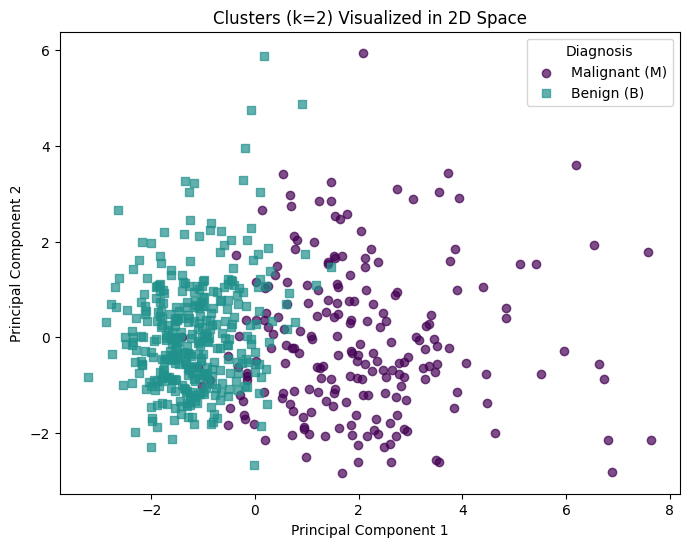

In [ ]:
from sklearn.decomposition import PCA

# Create PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[df['diagnosis'] == 'M', 0],
           X_pca[df['diagnosis'] == 'M', 1],
           c='#440154',
           marker='o',
           label='Malignant (M)',
           alpha=0.7)

plt.scatter(X_pca[df['diagnosis'] == 'B', 0],
           X_pca[df['diagnosis'] == 'B', 1],
           c='#21918c',
           marker='s',
           label='Benign (B)',
           alpha=0.7)

plt.title('Clusters (k=2) Visualized in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', loc='best')
plt.show()

In [ ]:
# Calculate the silhouette score for k = 2

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for k=2: {sil_score:.2f}")

Silhouette Score for k=2: 0.40


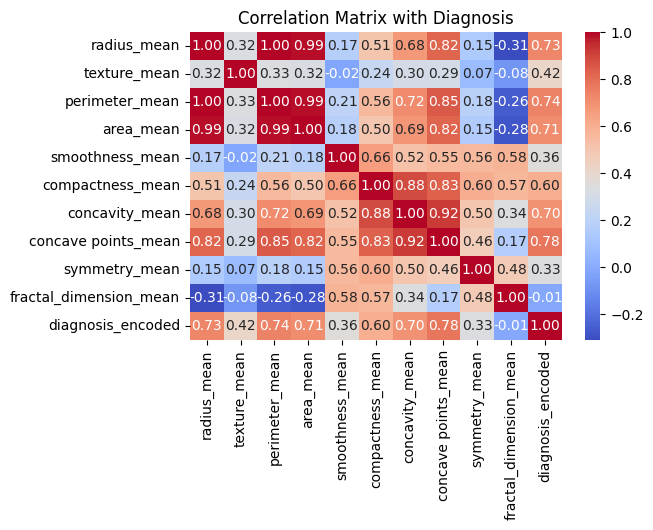

In [ ]:
# Correlation analysis with target variable

X_mean['diagnosis_encoded'] = df['diagnosis_encoded']
corr_matrix = X_mean.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Diagnosis')
plt.show()

In [ ]:
# Choosing features

X = X_scaled.drop(columns=['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean'], axis=1)

In [ ]:
# Supervised learning: Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

logreg = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Predict positive probabilities for each instance
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_probs)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ROC AUC Score: 0.9851190476190477
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        72
           1       0.89      0.81      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

[[68  4]
 [ 8 34]]


In [ ]:
# Adjusting threshold to prioritize recall

y_pred_adjusted = (y_pred_probs >= 0.3).astype(int)

print(classification_report(y_test, y_pred_adjusted))
print(confusion_matrix(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[68  4]
 [ 1 41]]


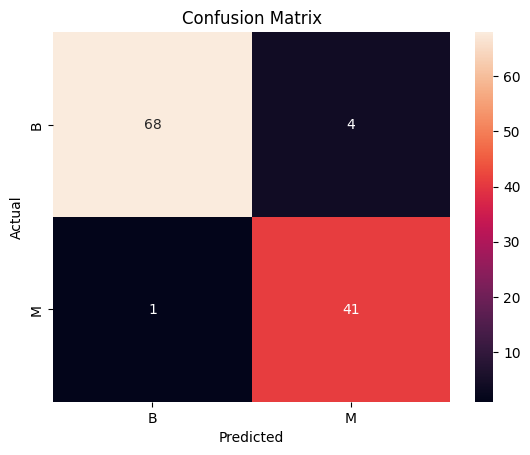

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['B', 'M'])
plt.yticks([0.5, 1.5], ['B', 'M'])
plt.title('Confusion Matrix')
plt.show()

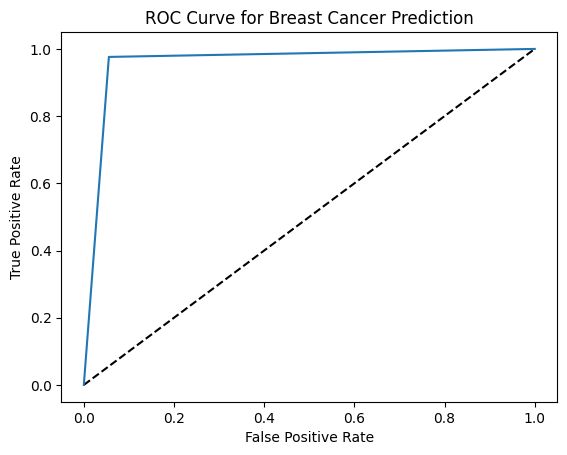

ROC AUC Score: 0.9603174603174603


In [ ]:
# Plotting ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adjusted)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Prediction')
plt.show()
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_adjusted)}')